In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
with open('/content/drive/MyDrive/Research Study/new epochs vs epochs with different split dataset/Data_RandomSampled_6%.pkl', 'rb') as file: #fetching the randome sampled dataset
    train_data = pickle.load(file) #loading data into a variable

In [ ]:
len(train_data)

621

In [ ]:
train_images, train_labels = zip(*train_data) #extracting the train images and train labels into varibales.

In [ ]:
''' converting labels into to_categorical '''
train_labels = to_categorical(train_labels)    #converting labels to categorical values using one hot encoding method
train_images = np.array(train_images)          #converting to numpy array
train_labels = np.array(train_labels)          #converting to numpy array
print(train_images.shape)                      #printing shape of images array
print(train_labels.shape)                      #printing shape of labels array

(621, 150, 150, 3)
(621, 4)


In [ ]:
''' reshaping images '''
train_images = train_images.reshape(-1,150,150,3) #reshaping train images array to fit into model input

In [ ]:
''' train test split '''
X_train, X_test, y_train, y_test = train_test_split(train_images,train_labels, test_size=0.2,random_state=1) #train test split function split data training and testing parts

In [ ]:
print(X_train.shape)     #printing shape of train images
print(X_test.shape)      #printing shape of test images
print(y_train.shape)     #printing shape of tarin labels
print(y_test.shape)      #printing shape of test labels

(496, 150, 150, 3)
(125, 150, 150, 3)
(496, 4)
(125, 4)


In [ ]:
#data augumentation is done to increase number of samples and provide different aspects of possiblies of input to model, using reshaping, flipping and rotating techniques
data_aug = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=20, zoom_range=0.2,
                    width_shift_range=0.2, height_shift_range=0.2, shear_range=0.1, fill_mode="nearest")

In [ ]:
#importing DenseNet pretrained model from Keras
model = tf.keras.applications.DenseNet201(input_shape=(150, 150, 3), include_top=False, weights='imagenet', pooling='avg')
model.trainable = True #unfreeze the layers to train model with our custom made dataset

74836368/74836368 [==============================] - 2s 0us/step


In [ ]:
custom_model = tf.keras.Sequential()                              #initialising a sequential model
custom_model.add(model)                                           #Adding densenet201 model to the sequential
custom_model.add(tf.keras.layers.Dense(128, activation='relu'))   #Adding custom dense layer with 128 neurons and relu activation function
custom_model.add(tf.keras.layers.Dense(4, activation='softmax'))  # Classification layer - final out put layer with 4 neurons and Softmax optimisation function
custom_model.compile(loss='categorical_crossentropy',             #compiling the model with loss defined as categorical cross entropy and
                     optimizer='adam', metrics=['accuracy'])           #adam optimiser. Once compiled, model is ready for tarining

In [ ]:
custom_model.summary() #summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 1920)              18321984  
                                                                 
 dense (Dense)               (None, 128)               245888    
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 18568388 (70.83 MB)
Trainable params: 18339332 (69.96 MB)
Non-trainable params: 229056 (894.75 KB)
_________________________________________________________________


#**100 Epochs**

In [ ]:
model_100_epochs = custom_model  #renaimhg

In [ ]:
history = model_100_epochs.fit(data_aug.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=100) #training the model with 100 epochs and 32 batch size

Epoch 1/100
16/16 [==============================] - 153s 1s/step - loss: 0.9737 - accuracy: 0.6653 - val_loss: 2.5228 - val_accuracy: 0.2560
Epoch 2/100
16/16 [==============================] - 5s 304ms/step - loss: 0.6723 - accuracy: 0.7560 - val_loss: 7.8068 - val_accuracy: 0.2000
Epoch 3/100
16/16 [==============================] - 5s 308ms/step - loss: 0.4659 - accuracy: 0.8246 - val_loss: 25.8992 - val_accuracy: 0.2080
Epoch 4/100
16/16 [==============================] - 6s 362ms/step - loss: 0.4816 - accuracy: 0.8044 - val_loss: 2.5205 - val_accuracy: 0.6320
Epoch 5/100
16/16 [==============================] - 5s 306ms/step - loss: 0.4494 - accuracy: 0.8387 - val_loss: 2.9934 - val_accuracy: 0.5040
Epoch 6/100
16/16 [==============================] - 6s 382ms/step - loss: 0.3951 - accuracy: 0.8427 - val_loss: 13.9308 - val_accuracy: 0.3440
Epoch 7/100
16/16 [==============================] - 5s 310ms/step - loss: 0.4427 - accuracy: 0.8569 - val_loss: 12.0805 - val_accuracy: 0.46

In [ ]:
''' prediction '''
y_pred=model_100_epochs.predict(X_test)      #predicting on test data
pred = np.argmax(y_pred,axis=1)              #taking the class of highest probability predictions
original = np.argmax(y_test,axis=1)          #test labels
print(classification_report(original,pred))  #validating original labekls with predicted labels to get accuracyt

4/4 [==============================] - 3s 87ms/step
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       0.92      0.97      0.95        37
           2       0.96      0.89      0.93        28
           3       1.00      0.94      0.97        36

    accuracy                           0.95       125
   macro avg       0.95      0.95      0.95       125
weighted avg       0.95      0.95      0.95       125



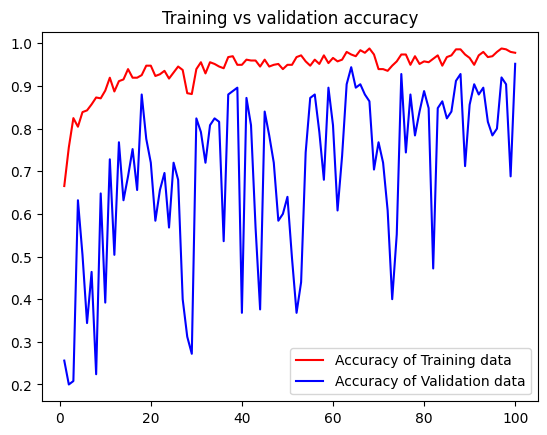

<Figure size 640x480 with 0 Axes>

In [ ]:
''' training accuracy and validation accuracy ygraph '''
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], 'r', label='Accuracy of Training data')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

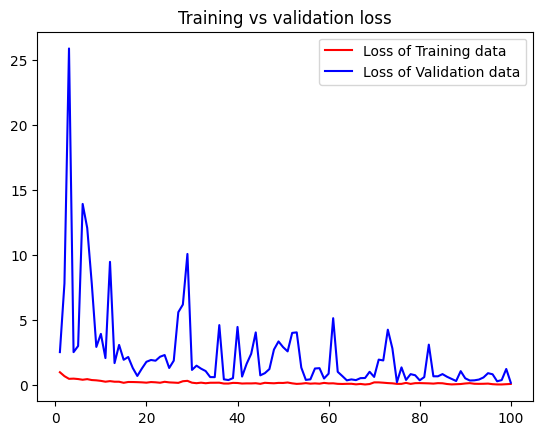

<Figure size 640x480 with 0 Axes>

In [ ]:
''' training loss and validation loss graph '''
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'], 'r', label='Loss of Training data')
plt.plot(epochs, history.history['val_loss'], 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(original, pred)
print("Accuracy: ", accuracy)

Accuracy:  0.952


In [ ]:
model_save_path = '/content/drive/MyDrive/Research Study/new epochs vs epochs with different split dataset/DenseNet201_6%.h5'
model_100_epochs.save(model_save_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
